# Character Dataset Cleaning

In this notebook, we will focus on examining the "characters.metadata.tsv" dataset, with particular attention to the age and gender of actors. Rather than integrating all character attributes, our primary objective is to analyze how actor demographics might influence a movie’s appeal and performance. By studying and cleaning the age and gender features specifically, we aim to extract insights that can contribute to a deeper understanding of casting trends and audience preferences in preparation for Milestone 3.

### Loading the Dataset

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle

In [2]:
folder = '../data/CMU/'
pickle_folder = "../data/pickle/"

In [3]:
character_original_data = pd.read_csv(folder + 'character.metadata.tsv',sep='\t',names=['Wikipedia_movie_ID',
'Freebase_movie_ID',
'Movie_release_date',
'Character_name',
'Actor_date_of_birth',
'Actor_gender',
'Actor_height_(in_meters)',
'Actor_ethnicity_(Freebase_ID)',
'Actor_name',
'Actor_age_at_movie_release',
'Freebase_character/actor_map_ID',
'Freebase_character_ID',
'Freebase_actor_ID'])

with open(pickle_folder + "movies_clean.p", "rb" ) as f:
    movies = pickle.load(f)

with open(pickle_folder + "movies_clean_with_season.p", "rb" ) as f:
    movies_season = pickle.load(f)

In [4]:
characters = character_original_data.copy()

In [5]:
print(characters.shape[0])

450669


In [6]:
movies_season

,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Year,Year_Interval,nb_of_Genres,Action,Adventure,Animated,Comedy,...,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes,release_season
0,3217,Army of Darkness,21502796.0,1992,1970-2000,12,True,True,True,True,...,False,False,False,False,False,False,True,7.4,197717.0,Autumn
1,3746,Blade Runner,33139618.0,1982,1970-2000,12,False,False,False,False,...,True,False,False,False,False,False,True,8.1,835060.0,Summer
2,3837,Blazing Saddles,119500000.0,1974,1970-2000,3,False,False,False,True,...,False,False,False,False,False,False,True,7.7,155432.0,Winter
3,3947,Blue Velvet,8551228.0,1986,1970-2000,3,False,False,False,False,...,False,False,False,False,False,False,True,7.7,219742.0,Summer
4,4227,Barry Lyndon,20000000.0,1975,1970-2000,7,False,False,False,False,...,False,False,False,False,False,True,True,8.1,186676.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,36598217,Secret Service of the Air,NaN,1939,1930-1950,3,True,False,False,False,...,False,False,False,False,False,False,True,5.7,271.0,Spring
16595,36674310,Mystery of Marie Roget,NaN,1942,1930-1950,1,False,False,False,False,...,False,False,False,False,False,False,True,5.9,371.0,Spring
16596,36683360,2016: Obama's America,33449086.0,2012,2000-2015,1,False,False,False,False,...,False,False,False,False,False,False,True,4.8,11049.0,Summer
16597,36814246,Eraserhead,7000000.0,1977,1970-2000,10,False,True,False,False,...,False,False,False,False,False,False,True,7.3,130107.0,Spring


## 1. Cleaning and adding features

- First, we combine the character dataframe with the movies_cleaned dataframe to drop all the movies. The goal is to benefeciate from the already preprocessed release date of movies of the movies_clean dataframe, as well as adding all features like average rating, Year, Year Interval, box office revenue, numVotes or the release season of the movie of each character.
This also allows us to eliminate movies that have a lot of missing data and to focus more on characters that comes from movies for which we have some informations.
- As printed below, this leave us with more than 270 000 characters and 33 000 movies.

In [7]:
cd = characters.drop(columns=[ 
                         'Freebase_movie_ID', 
                         'Character_name',
                         'Actor_height_(in_meters)',
                         'Actor_ethnicity_(Freebase_ID)',
                         'Freebase_character/actor_map_ID',
                         'Freebase_character_ID',
                         'Freebase_actor_ID'
                        ])

cd_clean = cd.merge(movies[['Wikipedia_movie_ID', 
                 'Movie_name',
                 'Movie_box_office_revenue',
                 'Year', 
                 'Year_Interval', 
                 'averageRating', 
                 'numVotes'
                ]],how='inner', on='Wikipedia_movie_ID')

cd_season = cd.merge(movies_season[['Wikipedia_movie_ID', 
                 'Movie_name',
                 'Movie_box_office_revenue',
                 'Year', 
                 'Year_Interval', 
                 'averageRating', 
                 'numVotes',
                 'release_season'
                ]],how='inner', on='Wikipedia_movie_ID')

print(f"Number of characters in the dataset (without seasons): {len(cd_clean)}")
print(f"Number of movies in the dataset : {len(cd_clean.groupby('Wikipedia_movie_ID'))}")

print(f"Number of characters in the dataset (with seasons): {len(cd_season)}")
print(f"Number of movies in the dataset : {len(cd_season.groupby('Wikipedia_movie_ID'))}")

Number of characters in the dataset (without seasons): 227100
Number of movies in the dataset : 24089
Number of characters in the dataset (with seasons): 165655
Number of movies in the dataset : 15970


In [8]:
display(cd_clean.sample(5))

display(cd_season.sample(5))

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes
37828,32402164,2011-02-27,NaN,M,Dennis Gunn,NaN,Yakuza Weapon,NaN,2011,2000-2015,5.1,612.0
45160,23378582,1974-04-11,1922-12-02,M,Don Fellows,51.0,The Spikes Gang,NaN,1974,1970-2000,6.3,1989.0
157308,5969123,1989,1936-07-28,M,Lau Kar-leung,52.0,Pedicab Driver,NaN,1989,1970-2000,7.4,1073.0
166679,919392,2003-01-25,NaN,M,Ron Lea,NaN,The Recruit,101191884.0,2003,2000-2015,6.6,143287.0
185096,3997734,2006-07-13,1973-02-15,F,Alex Borstein,33.0,Little Man,101589228.0,2006,2000-2015,4.5,61004.0


,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season
115152,32092686,2012-02-13,1964-05-25,M,Ray Stevenson,47.0,Jayne Mansfield's Car,NaN,2012,2000-2015,6.2,3624.0,Winter
7072,33384315,2011-10-13,NaN,M,Harli Ames,NaN,The Cup,NaN,2011,2000-2015,5.6,871.0,Autumn
35009,213149,2000-05-19,1963-01-11,M,Jason Connery,37.0,Shanghai Noon,99274467.0,2000,1970-2000,6.6,136838.0,Spring
107658,18599471,2009-02-09,1964-09-02,M,Keanu Reeves,44.0,The Private Lives of Pippa Lee,2770941.0,2009,2000-2015,6.3,14329.0,Winter
44100,4492078,2006-08-25,1992-08-02,F,Hallie Kate Eisenberg,14.0,How to Eat Fried Worms,13040527.0,2006,2000-2015,5.3,6127.0,Summer


- Now, we proceed to check if the release_date have the correct format, i.e. that there are no movies before 1888 (date of the first movie in history) and after 2016 (known limit of the dataset)

In [9]:
print("Dataset without seasons :")
test = cd_clean.copy()
display(test['Year'].describe())

print("\nDataset with seasons :")
test = cd_season.copy()
display(test['Year'].describe())

Dataset without seasons :


count    227100.000000
mean       1986.295425
std          23.076340
min        1915.000000
25%        1971.000000
50%        1995.000000
75%        2005.000000
max        2014.000000
Name: Year, dtype: float64


Dataset with seasons :


count    165655.000000
mean       1988.000785
std          22.773106
min        1915.000000
25%        1975.000000
50%        1997.000000
75%        2006.000000
max        2014.000000
Name: Year, dtype: float64

- Check if monthes have the correct format (superior to 0 and inferior to 13) 

In [10]:
print("\nDataset with seasons :")
test = cd_season.copy()
test['mois'] = test['Movie_release_date'].str.split('-').str[1]
test['mois'] = test['mois'].astype(int)
test['mois'].describe()


Dataset with seasons :


count    165655.000000
mean          6.833540
std           3.390488
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: mois, dtype: float64

- Check if days have the correct format (superior to 0 and inferior to 32) 

In [11]:
print("\nDataset with seasons :")
test['jour'] = test['Movie_release_date'].str.split('-').str[2]
test['jour'] = test['jour'].dropna().astype(int)
test['jour'].describe()


Dataset with seasons :


count    157293.000000
mean         15.766913
std           8.467149
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64

- Now that we are confident about the correct format of the release date we can continue with the others feature

## 2. Cleaning Gender of Actors

- We now proceed to the conversion of the "Actor_gender" feature (which contains either 'M' for Male or 'F' for Female, both being strings) into two features "gender_F" and "gender_M" (which will contains only boolean variable True or False). Hence, as seen in Exercise 6, we use the method get_dummies from pandas

In [12]:
cd_actors = cd.copy()
cd_actors.dropna(subset="Actor_gender",inplace = True)
dummies = pd.get_dummies(cd_actors['Actor_gender'], prefix = 'gender')
cd_actors = cd_actors.merge(dummies, left_index=True, right_index=True)
cd_actors

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,gender_F,gender_M
0,975900,2001-08-24,1958-08-26,F,Wanda De Jesus,42.0,True,False
1,975900,2001-08-24,1974-08-15,F,Natasha Henstridge,27.0,True,False
2,975900,2001-08-24,1969-06-15,M,Ice Cube,32.0,False,True
3,975900,2001-08-24,1967-09-12,M,Jason Statham,33.0,False,True
4,975900,2001-08-24,1977-09-25,F,Clea DuVall,23.0,True,False
...,...,...,...,...,...,...,...,...
450662,913762,1992-05-21,1958,F,Susan Byrkett,34.0,True,False
450663,913762,1992-05-21,NaN,M,Hal Cleaveland,NaN,False,True
450664,913762,1992-05-21,1970-05,F,Dorothy Elias-Fahn,NaN,True,False
450665,913762,1992-05-21,1965-04-12,M,Jonathan Fahn,27.0,False,True


- Here, we verify that all the values for the XOR are True (which means either gender_F is true or gender_M is true)

In [13]:
test['XOR'] = cd_actors['gender_F'] ^ cd_actors['gender_M']
test['XOR'].describe()

count     148392
unique         1
top         True
freq      148392
Name: XOR, dtype: object

In [14]:
with open(pickle_folder+"characters_clean.p", "wb" ) as f:
    cd = cd_actors
    pickle.dump(cd,f)

## 3. Verify the correctness of the age of actors

### 3.1. Dropping missing data

- In this part the goal is to find all the errors involving the age of actors, so first we drop all the rows where actor's date of birth are not given

In [15]:
cd_actorYear = cd_season.copy()
print(f"Number of actors dropped : {cd_actorYear.Actor_date_of_birth.isna().sum()}")
cd_actorYear.dropna(subset = 'Actor_date_of_birth', inplace = True)
cd_actorYear

Number of actors dropped : 33527


,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season
0,975900,2001-08-24,1958-08-26,F,Wanda De Jesus,42.0,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer
1,975900,2001-08-24,1974-08-15,F,Natasha Henstridge,27.0,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer
2,975900,2001-08-24,1969-06-15,M,Ice Cube,32.0,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer
3,975900,2001-08-24,1967-09-12,M,Jason Statham,33.0,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer
4,975900,2001-08-24,1977-09-25,F,Clea DuVall,23.0,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165647,30553937,1998-03-07,1970-06-22,M,Michael Trucco,27.0,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring
165648,30553937,1998-03-07,1948-10-05,M,Sal Viscuso,49.0,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring
165649,30553937,1998-03-07,1965-11-16,F,Anneliza Scott,32.0,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring
165650,30553937,1998-03-07,1959-04-02,M,Steve Monarque,38.0,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring


### 3.2. Verification of the year of birth of actors 

In [16]:
cd_actorYear['Year_of_birth'] = cd_actorYear['Actor_date_of_birth'].str[:4].astype(int)

# Print les 20 acteurs les plus jeunes du dataset
cd_actorYear.sort_values(by='Year_of_birth',ascending=False).head(20)

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth
127105,5273390,1993-11-19,2011-09-02,M,John Cassini,-17.0,Man's Best Friend,12974636.0,1993,1970-2000,5.2,4986.0,Autumn,2011
102029,789903,2004-07-23,2011-09-02,M,John Cassini,-7.0,Catwoman,82102379.0,2004,2000-2015,3.4,127266.0,Summer,2011
26560,1693867,2000-10-06,2011-09-02,M,John Cassini,-10.0,Get Carter,NaN,2000,1970-2000,5.1,37286.0,Autumn,2011
144768,2177168,2000-09-22,2011-09-02,M,John Cassini,-10.0,Chain of Fools,NaN,2000,1970-2000,6.0,4389.0,Autumn,2011
162489,27111227,2010-10-02,2008-05-31,F,Alexis Clagett,2.0,Life as We Know It,105648706.0,2010,2000-2015,6.5,140106.0,Autumn,2008
30830,34537226,2012-01-25,2008-01-10,M,Finn Donoghue,4.0,Price Check,NaN,2012,2000-2015,5.5,2361.0,Winter,2008
70757,32298508,2011-09-09,2008-10-29,M,Owen Bento,2.0,Friends with Kids,12186625.0,2011,2000-2015,6.1,43312.0,Autumn,2008
162491,27111227,2010-10-02,2008-05-31,F,Brooke Clagett,2.0,Life as We Know It,105648706.0,2010,2000-2015,6.5,140106.0,Autumn,2008
162490,27111227,2010-10-02,2008-05-31,F,Brynn Clagett,2.0,Life as We Know It,105648706.0,2010,2000-2015,6.5,140106.0,Autumn,2008
126617,22928463,1979-05-16,2006-07-15,M,Senne Rouffaer,-27.0,Woman Between Wolf and Dog,NaN,1979,1970-2000,6.2,334.0,Spring,2006


- Hence, we remark that there is some actors for which the year of birth was wrongly given to us. We hence decided to remove first all actors where their year of birth is superior to 2014 and inferior to 1800 (because we study the period between 1915 and 2015) : 

In [17]:
cd_actorYear = cd_actorYear[cd_actorYear['Year_of_birth'] <= 2014]
cd_actorYear = cd_actorYear[cd_actorYear['Year_of_birth'] >= 1800]
cd_actorYear.sort_values(by='Year_of_birth').tail(20)

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth
151069,22180695,2010-05-20,2004-02-01,F,Ashley Gerasimovich,6.0,Fair Game,24188922.0,2010,2000-2015,6.8,51479.0,Spring,2004
4000,20019382,1977-09-28,2004-01-13,M,Don Blakely,-26.0,Short Eyes,NaN,1977,1970-2000,7.0,1602.0,Autumn,2004
112668,27872044,2011-09-14,2004,F,Gracie Whitton,7.0,Trespass,9612469.0,2011,2000-2015,5.3,46026.0,Autumn,2004
23319,34545385,2012-03-03,2004-06-23,F,Mana Ashida,7.0,Liar Game: Reborn,NaN,2012,2000-2015,6.2,693.0,Spring,2004
21738,31011459,2011-06,2004-06-23,F,Mana Ashida,NaN,Bunny Drop,6569857.0,2011,2000-2015,7.2,1852.0,Summer,2004
67107,25971350,2010-01-24,2004-03-02,F,Faith Wladyka,5.0,Blue Valentine,12355734.0,2010,2000-2015,7.3,214096.0,Winter,2004
72567,32818732,2012-05-23,2005,F,Nastya Golubeva Carax,7.0,Holy Motors,NaN,2012,2000-2015,7.0,49463.0,Spring,2005
126617,22928463,1979-05-16,2006-07-15,M,Senne Rouffaer,-27.0,Woman Between Wolf and Dog,NaN,1979,1970-2000,6.2,334.0,Spring,2006
39073,22933412,2010-06-24,2006-05-06,F,Sadie Madison Sandler,4.0,Grown Ups,271430189.0,2010,2000-2015,6.0,284292.0,Summer,2006
53794,16204877,2008-12-24,2006-05-06,F,Sadie Madison Sandler,2.0,Bedtime Stories,212874442.0,2008,2000-2015,6.0,102384.0,Winter,2006


- We also decided to recompute Actor_age_at_movie_release as it is not given for all rows. Thus, we can compensate the missing data by substracting the year_of_birth of an actor to the Year of release of their movie.

In [18]:
cd_actorYear.dropna(subset='Movie_release_date',inplace=True)
cd_actorYear["Year"] = cd_actorYear['Movie_release_date'].str[:4].astype(int)
cd_actorYear['Actor_age_at_movie_release'] = cd_actorYear["Year"]-cd_actorYear["Year_of_birth"]
cd_actorYear['Actor_age_at_movie_release'].describe()

count    132122.000000
mean         39.515175
std          16.261633
min        -975.000000
25%          29.000000
50%          38.000000
75%          49.000000
max         115.000000
Name: Actor_age_at_movie_release, dtype: float64

- Then, by observing the describe() method, we notice negative age of actors at movie release which is impossible. Hence, decided to quantify how many outliers we had.

In [19]:
test = cd_actorYear[cd_actorYear['Actor_age_at_movie_release'] <= 0]
len(test)

138

- Then, we decided to handle these incoherence in the dataset by removing them because of the weak proportion of actors 'outliers' compared to the size of the dataset (130/130000 = 0.1%)


In [20]:
cd_actorYear = cd_actorYear[cd_actorYear['Actor_age_at_movie_release'] > 0]
cd_actorYear

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth
0,975900,2001-08-24,1958-08-26,F,Wanda De Jesus,43,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1958
1,975900,2001-08-24,1974-08-15,F,Natasha Henstridge,27,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1974
2,975900,2001-08-24,1969-06-15,M,Ice Cube,32,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1969
3,975900,2001-08-24,1967-09-12,M,Jason Statham,34,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1967
4,975900,2001-08-24,1977-09-25,F,Clea DuVall,24,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165647,30553937,1998-03-07,1970-06-22,M,Michael Trucco,28,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1970
165648,30553937,1998-03-07,1948-10-05,M,Sal Viscuso,50,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1948
165649,30553937,1998-03-07,1965-11-16,F,Anneliza Scott,33,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1965
165650,30553937,1998-03-07,1959-04-02,M,Steve Monarque,39,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1959


- Finally, we wanted to see if there was old people as actors for certain movies :

In [21]:
test = cd_actorYear[cd_actorYear['Actor_age_at_movie_release'] >= 100]
test

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth
114895,13328446,1990-12-13,1875-02-21,F,Jeanne Calment,115,Vincent and Me,NaN,1990,1970-2000,6.2,335.0,Winter,1875


- When we searched online for the names of this actress, we found out that Jeanne Calment really played in 'Vincent and Me' at the age of 115 years old !

- Finally, after the handling of all the outliers, here is a graphic plotting the year of birth of all actors as a function of the year of release of the movie they played in

Text(0.5, 0, 'Year of the release of the movie')

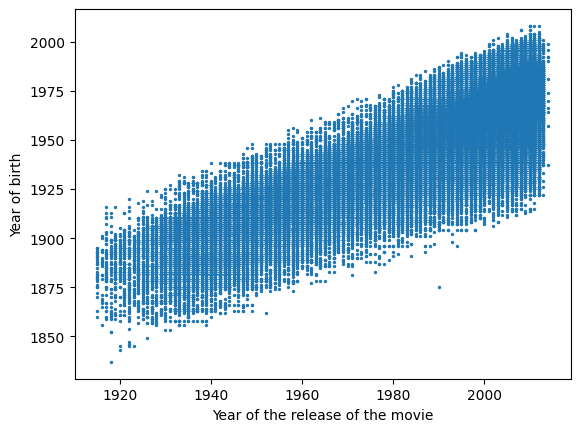

In [22]:
ax = cd_actorYear.plot.scatter(x = 'Year', y = 'Year_of_birth', s = 2)
ax.set_ylabel('Year of birth')
ax.set_xlabel('Year of the release of the movie')

- We conclude this preprocessing by adding a column age interval to classificate the differents categories of actors

In [23]:
categories = ['Baby(0-3)', 'Kid(3-13)', 'Teenager(13-19)', 'Young Actor(19-30)', 'Experimented Actor(30-60)', 'Old Actor(60+)']
cd_actorYear['Age_Interval'] = pd.cut(cd_actorYear['Actor_age_at_movie_release'], bins=[0, 3, 13, 19, 30, 60, 120], labels=categories)
cd_actorYear['Age_Interval'] = cd_actorYear['Age_Interval'].astype(str)

with open(pickle_folder+"characters_clean.p", "wb" ) as f:
    cd = cd_actorYear
    pickle.dump(cd,f)

cd

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth,Age_Interval
0,975900,2001-08-24,1958-08-26,F,Wanda De Jesus,43,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1958,Experimented Actor(30-60)
1,975900,2001-08-24,1974-08-15,F,Natasha Henstridge,27,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1974,Young Actor(19-30)
2,975900,2001-08-24,1969-06-15,M,Ice Cube,32,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1969,Experimented Actor(30-60)
3,975900,2001-08-24,1967-09-12,M,Jason Statham,34,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1967,Experimented Actor(30-60)
4,975900,2001-08-24,1977-09-25,F,Clea DuVall,24,Ghosts of Mars,14010832.0,2001,2000-2015,4.9,58585.0,Summer,1977,Young Actor(19-30)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165647,30553937,1998-03-07,1970-06-22,M,Michael Trucco,28,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1970,Young Actor(19-30)
165648,30553937,1998-03-07,1948-10-05,M,Sal Viscuso,50,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1948,Experimented Actor(30-60)
165649,30553937,1998-03-07,1965-11-16,F,Anneliza Scott,33,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1965,Experimented Actor(30-60)
165650,30553937,1998-03-07,1959-04-02,M,Steve Monarque,39,Confessions of a Sexist Pig,NaN,1998,1970-2000,4.9,534.0,Spring,1959,Experimented Actor(30-60)


In [24]:
len(cd_actorYear.groupby("Wikipedia_movie_ID"))

15821